In [75]:
import numpy as np
from tasks import *
from reservoir_net import *
import torch
from torch import nn,mm
import matplotlib.pyplot as plt

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
#device = 'cpu'
trans = lambda x: x.transpose(-1,-2)
my_conv = lambda a: torch.tensor(a,device=device,dtype=torch.float32).permute(1,2,0)[None,:,:,:]

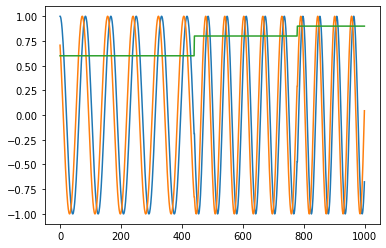

In [111]:
task_params={
    'inp_range':np.arange(0.5,1,0.1),
    'out_split_style':'phase',
    'split':2,
    'freq_func': lambda omega:omega/5,
    'fix':0
}
task = sine_wave_task(**task_params)

inputs,targets = task.generate_many(1000,2,phases=np.array([0,np.pi/4]))
l=plt.plot(targets[0])
l=plt.plot(inputs[0])

In [88]:
net_params = {
    "input_size" : 1,
    "N":256,
    'g':0.9,
    'dt':0.1,
    'rank':2,
    'device':device
}
#net = online_learn_net(**net_params)
#net = net.to(device)
net = reservoir_net(**net_params)

In [96]:
for i in range(10):
    inputs,targets = task.generate_many(500,1)
    inputs,targets = map(my_conv,[inputs,targets])
    x,z = net.run(inputs,f=targets,RLS=True)
#z,x = net.run(trans(inputs[0].T),target=trans(targets[0].T),learn_alg="RLS")


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [7]:
inputs,targets = task.generate_many(5,2)
print(inputs.shape,targets.shape)
inputs,targets = map(my_conv,[inputs,targets])
print(inputs.shape,targets.shape)

(1, 5, 1) (1, 5, 2)
torch.Size([1, 5, 1, 1]) torch.Size([1, 5, 2, 1])


torch.Size([1, 500, 256, 1])

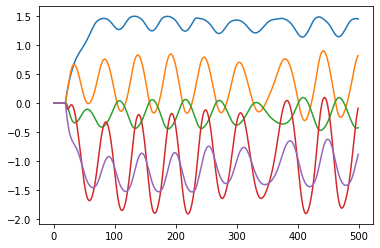

In [73]:
plt.plot(x[0,:,:5,0].detach().cpu())
x.shape

  0%|          | 0/3000 [00:00<?, ?it/s]

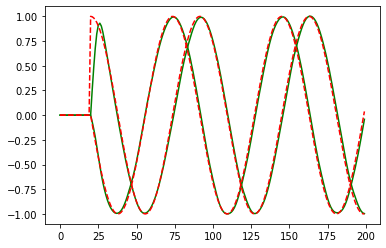

In [106]:
inputs,targets = task.generate_many(3000,1)
inputs,targets = map(my_conv,[inputs,targets])
#z,x = net.run(trans(inputs[0].T),target=trans(targets[0].T),learn_alg="RLS")
#z,x = net.run(trans(inputs[0].T),target=trans(targets[0].T))
x,z = net.run(inputs,RLS=False)

l=plt.plot(z[0,:200,:,0].detach().cpu(),'green',label="output")
l=plt.plot(targets[0,:200,:,0].detach().cpu(),'red',ls='dashed',label="target")

In [101]:
#plt.plot(z[0].detach().cpu()[:2000])
#plt.plot(targets[0].detach().cpu()[:2000,0,0].T)


In [107]:
input_val = np.arange(0.01,1.5,0.01)
inputs,targets = task.generate_many(1000,len(input_val),input_val=input_val)
inputs,targets = map(my_conv,[inputs,targets])
x,z = net.run(inputs,RLS=False)

  0%|          | 0/1000 [00:00<?, ?it/s]

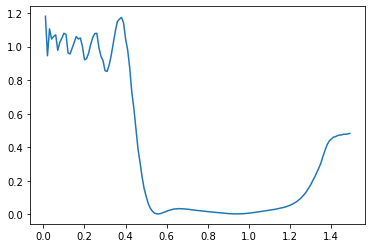

In [108]:
mse = torch.mean((z[:,:,:1].to(device)-targets[:,:,:1].to(device))**2,(0,1,2))
plt.plot(input_val,mse.detach().cpu())

torch.Size([1, 3000, 2, 2])